<a href="https://colab.research.google.com/github/Sachin-crypto/Accuracy_Comparison_Deep-Learning/blob/main/Comparing_Transfer_Learning_Models_Accuracy_for_100_Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import Xception, InceptionV3, VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Specifying train, valid and test directory paths
train_path = "/content/drive/MyDrive/Datasets/cats&dogs/train"
valid_path = "/content/drive/MyDrive/Datasets/cats&dogs/valid"
test_path = "/content/drive/MyDrive/Datasets/cats&dogs/test"

In [4]:
# Preprocessing images
train_batches = ImageDataGenerator(rescale=1.0 / 255.0)
valid_batches = ImageDataGenerator(rescale=1.0 / 255.0)
test_batches = ImageDataGenerator(rescale=1.0 / 255.0)

In [5]:
# Generating data from batches
train_gen = train_batches.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    classes=['cat', 'dog'],
    batch_size=10
)

valid_gen = valid_batches.flow_from_directory(
    directory=valid_path,
    target_size=(224, 224),
    classes=['cat', 'dog'],
    batch_size=10
)

test_gen = test_batches.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    classes=['cat', 'dog'],
    batch_size=10,
    shuffle=False
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
# Initializing models
model_vgg = VGG16(include_top=False, input_shape=(224, 224, 3)) # include_top=False: To not include first 3 fully connected layers
model_xception = Xception(include_top=False, input_shape=(224, 224, 3))
model_inception = InceptionV3(include_top=False, input_shape=(224, 224, 3))
model_resnet = ResNet50(include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [7]:
# Freezing the layers so that they cannot be trained again
names = [model_vgg, model_xception, model_inception, model_resnet]
for model in names:
    for layer in model.layers:
        layer.trainable = False

In [8]:
# Customizing the models
output_classes = len(train_gen.class_indices)

# Custom VGG16 model
custom_vgg_model = Sequential([
    model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(output_classes, activation='softmax')
])

# Custom Xception model
custom_xc_model = Sequential([
    model_xception,
    GlobalAveragePooling2D(),
    Dense(output_classes, activation='softmax')
])

# Custom Inception model
custom_inc_model = Sequential([
    model_inception,
    GlobalAveragePooling2D(),
    Dense(output_classes, activation='softmax')
])

# Custom ResNet model
custom_resnet_model = Sequential([
    model_resnet,
    GlobalAveragePooling2D(),
    Dense(output_classes, activation='softmax')
])

In [9]:
# Compiling the model
models = [custom_vgg_model, custom_xc_model, custom_inc_model, custom_resnet_model]

for model in models:
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

>>> Training VGG16 model:
>>> Evaluating VGG16 on the Test data:
10/10 [==============================] - 67s 7s/step
>>> Test Accuracy for VGG16: 93.00%.
>>> Training Xception model:
>>> Evaluating Xception on the Test data:
10/10 [==============================] - 1s 44ms/step
>>> Test Accuracy for Xception: 100.00%.
>>> Training InceptionV3 model:
>>> Evaluating InceptionV3 on the Test data:
10/10 [==============================] - 2s 50ms/step
>>> Test Accuracy for InceptionV3: 99.00%.
>>> Training ResNet50 model:
>>> Evaluating ResNet50 on the Test data:
10/10 [==============================] - 2s 60ms/step
>>> Test Accuracy for ResNet50: 65.00%.


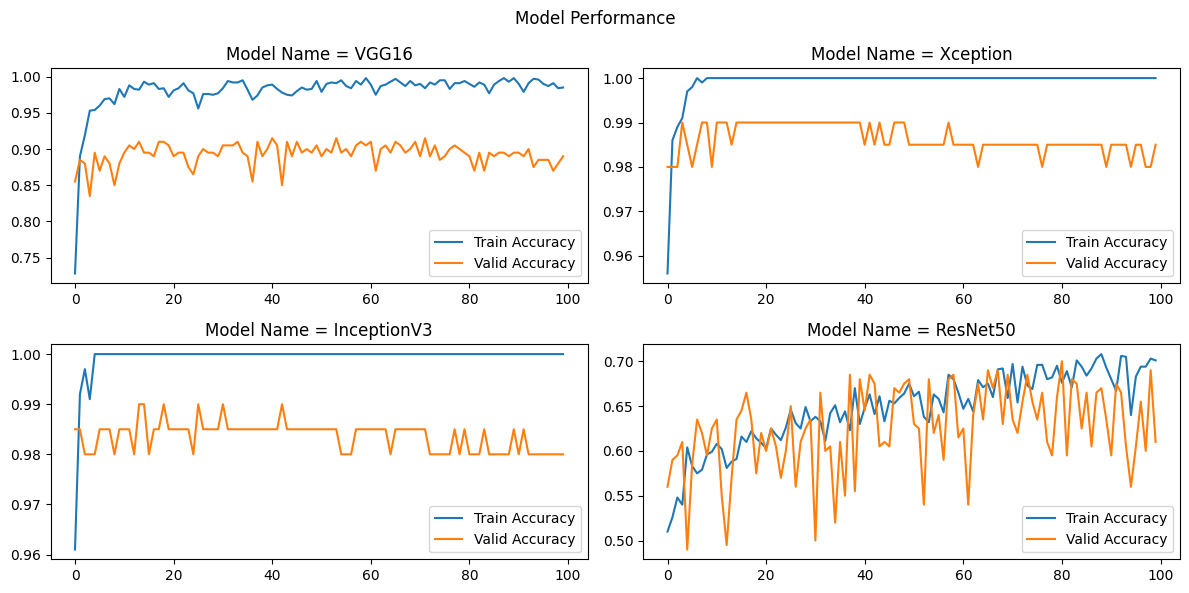

In [10]:
# Training the model
model_histories = []
model_names = [(custom_vgg_model, "VGG16"), (custom_xc_model, "Xception"), (custom_inc_model, "InceptionV3"), (custom_resnet_model, "ResNet50")]
for model, model_name in model_names:
    print(f">>> Training {model_name} model:")

    result = model.fit(
        train_gen,
        validation_data=valid_gen,
        epochs=100,
        verbose=0
    )

    model_histories.append((result.history, model_name))

    print(f">>> Evaluating {model_name} on the Test data:")
    test_pred = model.predict(test_gen)
    test_labels = test_gen.classes
    test_accuracy = accuracy_score(np.argmax(test_pred, axis=1), test_labels)
    print(f">>> Test Accuracy for {model_name}: {test_accuracy * 100:.2f}%.")

# Plot learning curves for each model
plt.figure(figsize=(12, 6))
for i, (history, model_name) in enumerate(model_histories):
    plt.subplot(2, 2, i + 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Valid Accuracy')
    plt.legend()
    plt.title(f'Model Name = {model_name}')

plt.suptitle("Model Performance")
plt.tight_layout()
plt.show()